#  🎯Step-1) Business Problem Understanding

The Crop Recommendation System is revolutionizing how farmers choose crops. By taking into account the mineral composition of the soil, including potassium, nitrogen, and phosphorous, as well as factors like humidity, temperature, and rainfall, this data-driven project is empowering farmers with precise recommendations.Our main aim to increase crop production.

### ⚒️<u> Importing Required Python Libraries </u>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from IPython.display import IFrame

In [2]:
# Source: Wikipedia
IFrame('https://repository-images.githubusercontent.com/537292264/041decaf-92d7-4e6d-b8ba-d82f2bbb64ed', width=950, height=470)

# 🎯Step 2) Data Understanding

#### 🌟<u> Check and import dataset </u>

In [3]:
crop_data=pd.read_csv("C:\\Users\\HP\\Downloads\\ExtractFile\\Crop-Recommendation-system--main\\Crop_recommendation.csv")

#### 🌟<u> Data Understanding </u>

In [4]:
crop_data.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'label'],
      dtype='object')

In [5]:
crop_data.head(6)

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice


In [6]:
crop_data.tail(6)

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall,label
2194,97,35,26,24.914610,53.741447,6.334610,166.254931,coffee
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [7]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
crop_data.describe().T.round(2).style.background_gradient(cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
Nitrogen,2200.000000,50.550000,36.920000,0.000000,21.000000,37.000000,84.250000,140.000000
Phosphorus,2200.000000,53.360000,32.990000,5.000000,28.000000,51.000000,68.000000,145.000000
Potassium,2200.000000,48.150000,50.650000,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.000000,25.620000,5.060000,8.830000,22.770000,25.600000,28.560000,43.680000
humidity,2200.000000,71.480000,22.260000,14.260000,60.260000,80.470000,89.950000,99.980000
ph,2200.000000,6.470000,0.770000,3.500000,5.970000,6.430000,6.920000,9.940000
rainfall,2200.000000,103.460000,54.960000,20.210000,64.550000,94.870000,124.270000,298.560000


In [9]:
# Find Unique values in label column
crop_data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

### 🌟 <u>Dataset Understanding </u>
<u> **The Role of Soil Minerals:** </u>
* **Potassium:** Potassium is a vital nutrient for plant growth, contributing to root development, disease resistance, and overall plant health. Soil tests reveal potassium levels, helping the system suggest crops that thrive in either high or low potassium conditions.


* **Nitrogen:** Nitrogen is essential for chlorophyll production and overall plant growth. Soil nitrogen content influences crop recommendations, as different crops have varying nitrogen requirements.


* **Phosphorous:** Phosphorous is crucial for root development and flowering. Soil phosphorous levels guide the system in suggesting crops that can optimize the available phosphorous.


<u> **Environmental Variables:** </u>

* **Humidity:** Crop success is closely tied to humidity levels. High humidity can lead to moisture-related diseases, while low humidity can result in stress for certain crops. The Crop Recommendation System factors in local humidity conditions to make precise recommendations.


* **Temperature:** Temperature affects the rate of plant growth and flowering. Some crops thrive in cooler conditions, while others prefer warmer climates. The system considers local temperature data for tailored suggestions.


* **Rainfall:** Rainfall during the growing season is essential for crop success. The Crop Recommendation System accounts for historical rainfall patterns and monsoon data to provide recommendations that align with local water availability.


# 🎯Step-3) Data Preparation

#### 🌟 <u> Data Cleaning </u>

* Checking missing values

In [10]:
crop_data.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
crop_data['label'].value_counts()  

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

* **Each label have 100 entries means data is balance**

###  🌟 <u> Exploratory Data Analysis (EDA)</u>

      Heatmap to check null or missing values

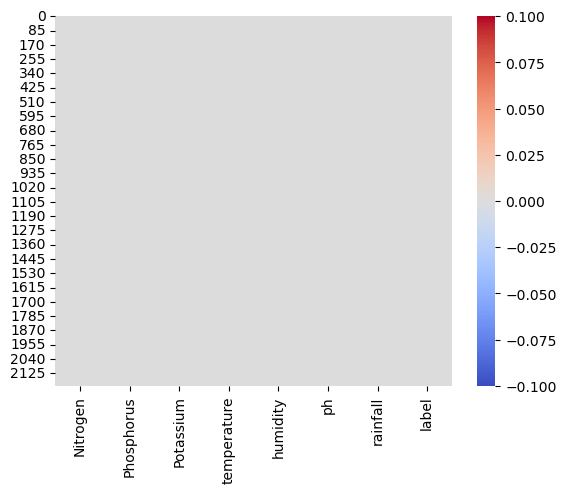

In [12]:
sns.heatmap(crop_data.isnull(),cmap="coolwarm")
plt.show()

# <h4> <u>look at the distribution of temperature and ph.</u><br><br>
    
* It is symmetrical and bell shaped, showing that trials will usually give a result near the average, but will occasionally deviate by large amounts. It's also fascinating how these two really resemble each other!</h4>

<Axes: xlabel='ph', ylabel='Density'>

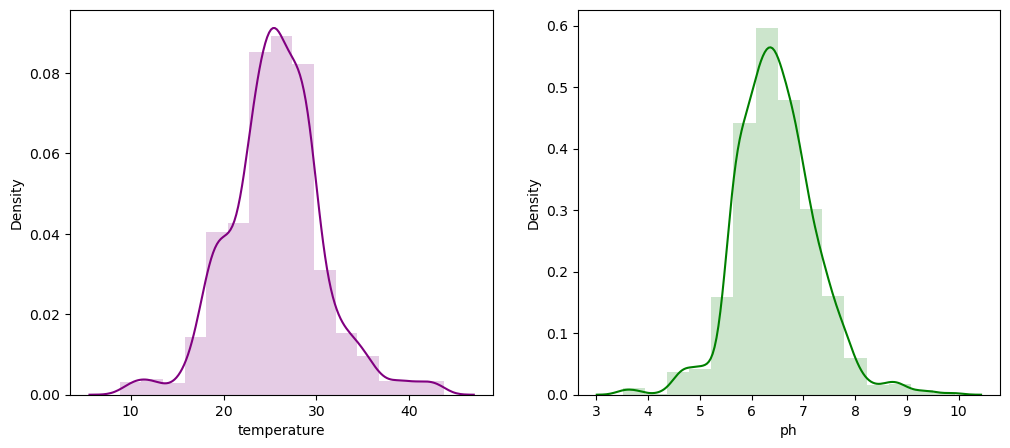

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.distplot(crop_data['temperature'],color="purple",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 2, 2)
sns.distplot(crop_data['ph'],color="green",bins=15,hist_kws={'alpha':0.2})

**A quick check if the dataset is balanced or not. If found imbalanced, we would have to downsample some targets which are more in quantity but so far everything looks good!** 

<Axes: xlabel='count', ylabel='label'>

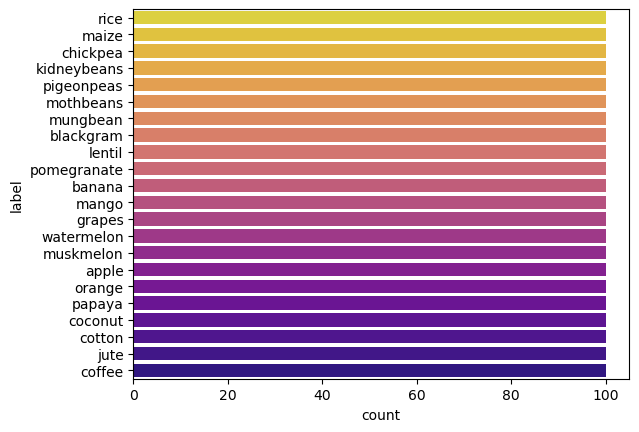

In [14]:
sns.countplot(y='label',data=crop_data, palette="plasma_r")

**A very important plot to visualize the diagonal distribution between two features for all the combinations! It is great to visualize how classes differ from each other in a particular space.**

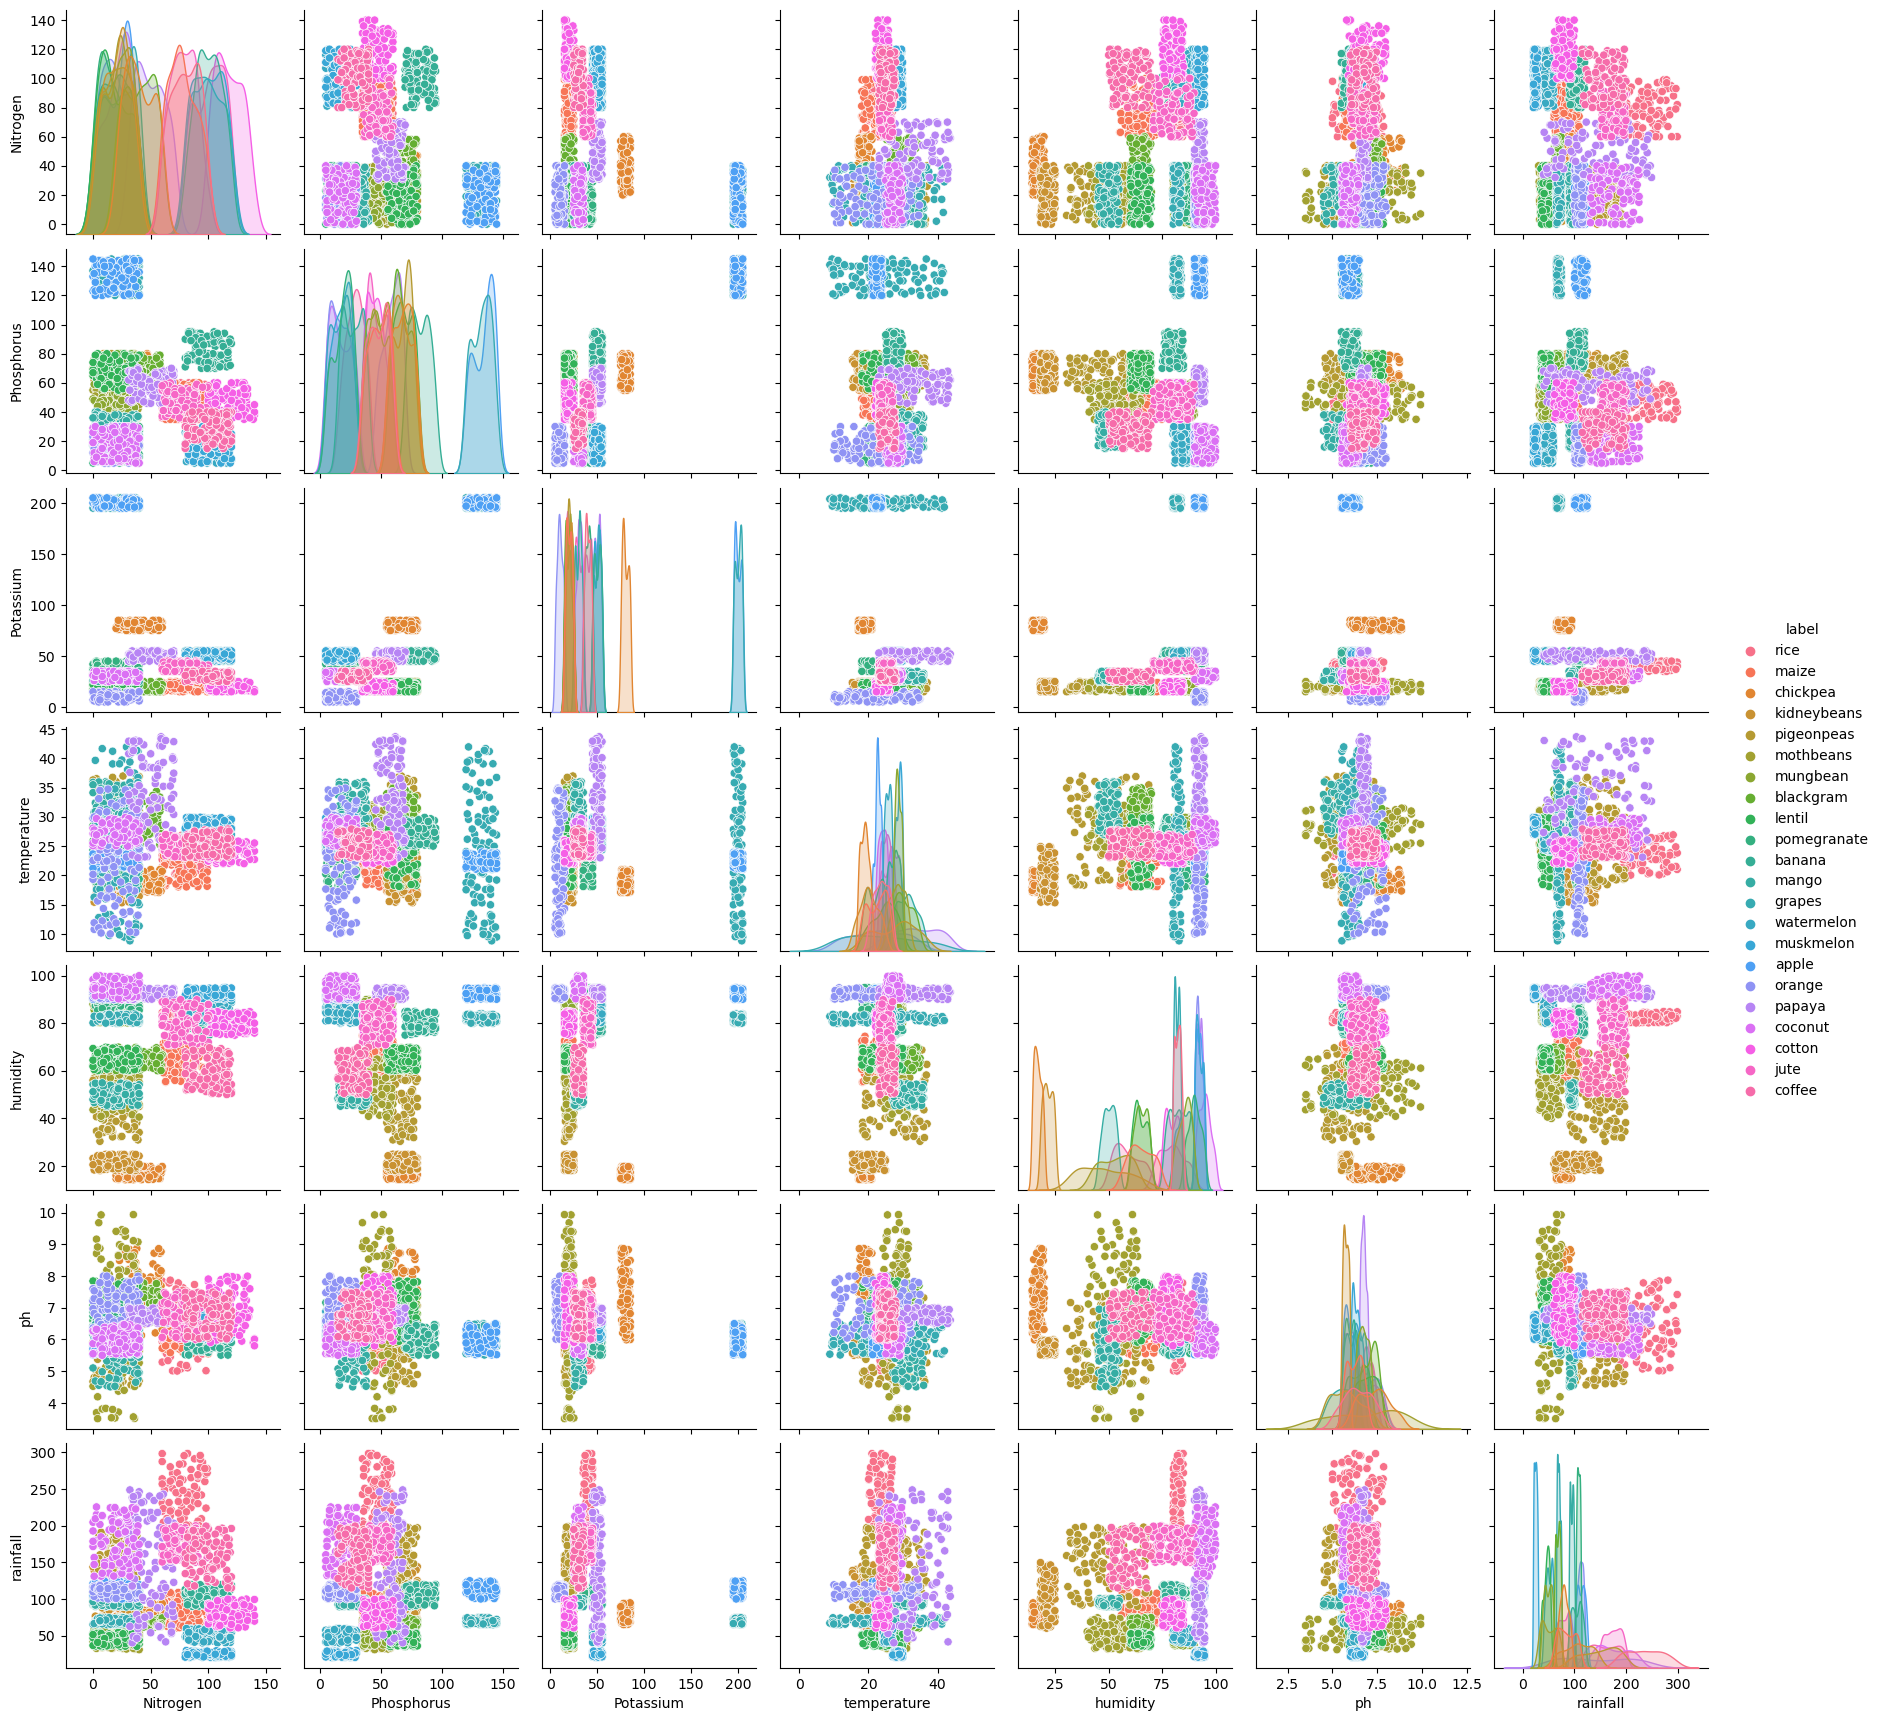

In [15]:
sns.pairplot((crop_data),hue ='label')

### 🪐During rainy season, average rainfall is high (average 120 mm) and temperature is mildly chill (less than 30'C).

##### Rain affects soil moisture which affects ph of the soil. Here are the crops which are likely to be planted during this season. 

- <b> Rice needs heavy rainfall (>200 mm) and a humidity above 80%. No wonder major rice production in India comes from East Coasts which has average of 220 mm rainfall every year!
- <b> Coconut is a tropical crop and needs high humidity therefore explaining massive exports from coastal areas around the country.

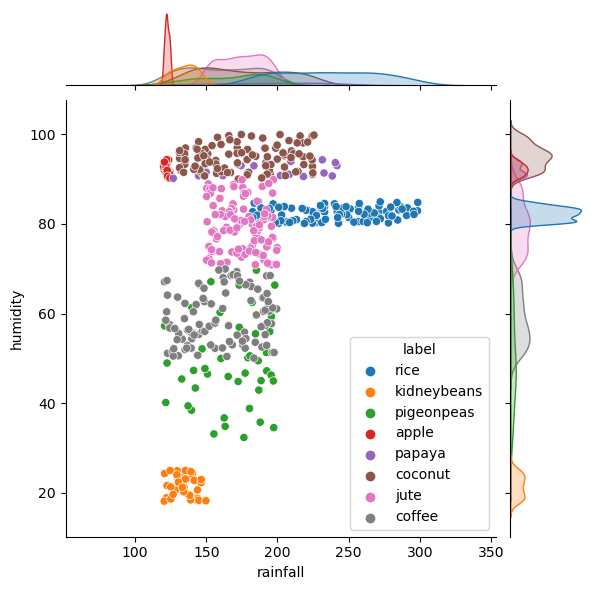

In [16]:
sns.jointplot(x="rainfall",y="humidity",data=crop_data[(crop_data['temperature']<30) & (crop_data['rainfall']>120)],hue="label")

### 🪐  This graph correlates with average potassium (K) and average nitrogen (N) value (both>50).
These soil ingredients direcly affects nutrition value of the food. Fruits which have high nutrients typically has consistent potassium values

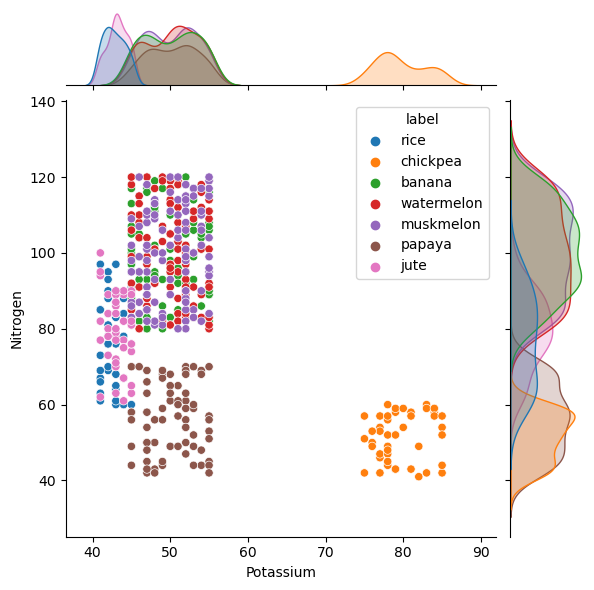

In [17]:
sns.jointplot(x="Potassium",y="Nitrogen",data=crop_data[(crop_data['Nitrogen']>40)&(crop_data['Potassium']>40)],hue="label")

###  🪐Let's try to plot a specfic case of pairplot between humidity and K (potassium levels in the soil.)
sns.jointplot() can be used for bivariate analysis to plot between humidity and K levels based on Label type. It further generates frequency distribution of classes with respect to features

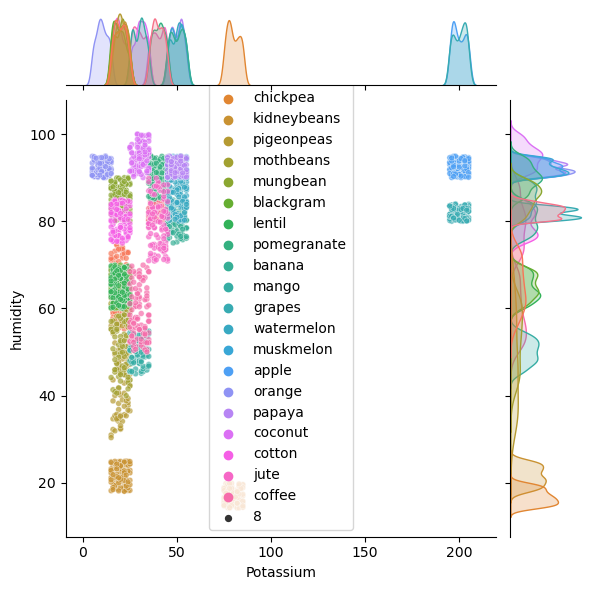

In [18]:
sns.jointplot(x="Potassium",y="humidity",data=crop_data,hue='label',size=8,s=30,alpha=0.7)

### 🪐We can see ph values are critical when it comes to soil. A stability between 6 and 7 is preffered**

<Axes: xlabel='ph', ylabel='label'>

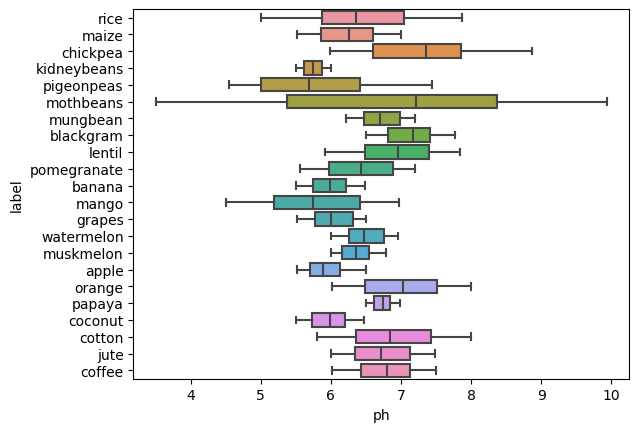

In [19]:
sns.boxplot(y='label',x='ph',data=crop_data)

In [20]:
X=crop_data[['Nitrogen','Phosphorus','Potassium','temperature','humidity','ph','rainfall']]
y=crop_data['label']

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 120.4 KB


In [22]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2200 entries, 0 to 2199
Series name: label
Non-Null Count  Dtype 
--------------  ----- 
2200 non-null   object
dtypes: object(1)
memory usage: 17.3+ KB


# 🧭 Data spliting

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state = 1,train_size=0.8)

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1760 entries, 1863 to 1061
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     1760 non-null   int64  
 1   Phosphorus   1760 non-null   int64  
 2   Potassium    1760 non-null   int64  
 3   temperature  1760 non-null   float64
 4   humidity     1760 non-null   float64
 5   ph           1760 non-null   float64
 6   rainfall     1760 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 110.0 KB


In [25]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 1760 entries, 1863 to 1061
Series name: label
Non-Null Count  Dtype 
--------------  ----- 
1760 non-null   object
dtypes: object(1)
memory usage: 27.5+ KB


In [26]:
X_train

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall
1863,1,12,30,27.754298,95.946438,5.562224,131.090008
987,11,10,45,22.630452,88.455772,6.397996,109.035760
375,5,74,21,16.244692,21.357939,5.591704,66.970533
1071,105,88,54,25.787498,84.511942,6.020445,114.200546
37,95,39,36,23.863305,83.152508,5.561399,285.249365
...,...,...,...,...,...,...,...
960,1,27,36,23.985988,93.342366,5.684995,104.991282
905,31,25,38,24.962732,92.405014,6.497367,109.416919
1096,92,81,52,28.010680,76.528081,5.891414,103.704078
235,28,58,81,17.475010,16.543148,6.180427,93.350343


In [27]:
y_train

1863        coconut
987     pomegranate
375     kidneybeans
1071         banana
37             rice
           ...     
960     pomegranate
905     pomegranate
1096         banana
235        chickpea
1061         banana
Name: label, Length: 1760, dtype: object

# 🎯Step-4) & 5) Machine Learning Modelling & Evaluation

### 1) Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model_LR = LogisticRegression().fit(X_train,y_train)
y_pred_LR= model_LR.predict(X_test)
logistic_reg_acc = accuracy_score(y_test, y_pred_LR)
print("Accuracy of logistic regression is :" + str(logistic_reg_acc))

Accuracy of logistic regression is :0.9704545454545455


### 2) Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
model_DTC = DecisionTreeClassifier(criterion='entropy',max_depth = 6, random_state = 2).fit(X_train, y_train)
y_pred_DTC = model_DTC.predict(X_test)
decision_acc = accuracy_score(y_test, y_pred_DTC)
print("Accuracy of decision  tree is :" + str(decision_acc))

Accuracy of decision  tree is :0.9772727272727273


### Let's visualize the import features which are taken into consideration by decision trees.

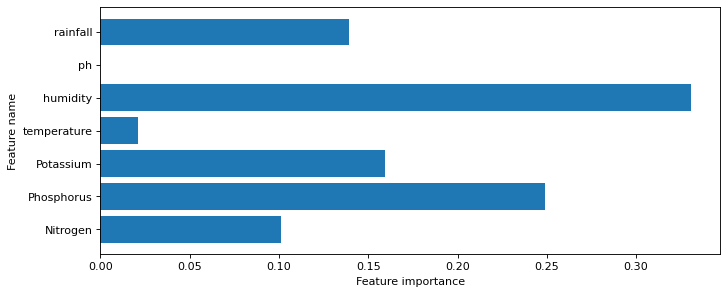

In [30]:
plt.figure(figsize=(10,4), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), model_DTC.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

### 3) Gradient Boosting Classifier

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
model_GB= GradientBoostingClassifier().fit(X_train, y_train)
y_pred_GB=model_GB.predict(X_test)
gradi_boost_acc=accuracy_score(y_test,y_pred_GB)
print("Gradient Boosting accuracy is :"+str(gradi_boost_acc))


Gradient Boosting accuracy is :0.9954545454545455


### 4) Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
model_NB= GaussianNB().fit(X_train, y_train)
y_pred_NB = model_NB.predict(X_test)
naive_bayes_acc = accuracy_score(y_test, y_pred_NB)
print("Accuracy of naive_bayes is :" + str(naive_bayes_acc))

Accuracy of naive_bayes is :0.9954545454545455


### 5) Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators = 25, random_state=2).fit(X_train.values, y_train.values)
y_pred_RF = model_RF.predict(X_test)
random_fore_acc = accuracy_score(y_test, y_pred_RF)
print("Accuracy of Random Forest is :" + str(random_fore_acc))


Accuracy of Random Forest is :0.9977272727272727


**From above machine learning algorithams 'Random Forest' has maximum accuracy**

# 🎯Step-6) Data Presentation

### 🌟 save the model

In [34]:
import joblib 

In [35]:
file_name = 'crop_app'

In [36]:
joblib.dump(model_NB,'crop_app')

['crop_app']

In [37]:
app = joblib.load('crop_app')

## 🪐 Crop Prediction

In [38]:
arr = [[150,45,43,37.131797,71.225123,9.362608,275.322839]]
acc = app.predict(arr)
acc

array(['rice'], dtype='<U11')

## 🧭  Conclusion:
The Crop Recommendation System represents the pinnacle of data-driven agriculture. By accounting for soil minerals, humidity, temperature, and rainfall, it empowers farmers to make informed decisions about crop selection. This approach not only boosts productivity but also contributes to more sustainable and resilient farming practices, which are essential for the future of agriculture in an ever-changing world. As technology continues to advance, projects like these demonstrate the transformative power of data in agriculture.